## CIS 4526 Sp23 Linear Regression Review Exercise

In [1]:
housing = "/kaggle/input/usa-housing/USA_Housing.csv"

### This Review Exercise will cover the following skill set
* Linear Regression
* selecting variables
* K-fold cross validation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### First load the data set

In [3]:
housing = pd.read_csv(housing)
housing.head()

,Income,HouseAge,NumberOfRooms,AreaNumberOfBedrooms,Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
housing.describe()

,Income,HouseAge,NumberOfRooms,AreaNumberOfBedrooms,Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


***We will skip EDA for this dataset***

***Follow the standard proper way of building a model and in particular,***
1. Use Scatter plots and correlation to identify the most important variable that can explain the house price.
2. Build a one-factor Linear Regression model using that variable
3. Print out the model performance metrics (MSE, R-square).
4. Plot your best-fitted line on top of the data.
5. Perform a 10-fold cross validation and determine if your model pass the cross-validation.
6. Add one addition variable to build a 2-factors model. Explain your reason why you choose that variable.
7. Repeat the validation and comment on whether the model improves or not

### 1.Use Scatter plots and correlation to identify the most important variable that can explain the house price.

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

housing._get_numeric_data().corr().style.background_gradient()

,Income,HouseAge,NumberOfRooms,AreaNumberOfBedrooms,Population,Price
Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
HouseAge,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
NumberOfRooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
AreaNumberOfBedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


array([[<AxesSubplot:xlabel='Income', ylabel='Income'>,
        <AxesSubplot:xlabel='HouseAge', ylabel='Income'>,
        <AxesSubplot:xlabel='NumberOfRooms', ylabel='Income'>,
        <AxesSubplot:xlabel='AreaNumberOfBedrooms', ylabel='Income'>,
        <AxesSubplot:xlabel='Population', ylabel='Income'>,
        <AxesSubplot:xlabel='Price', ylabel='Income'>],
       [<AxesSubplot:xlabel='Income', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='HouseAge', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='NumberOfRooms', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='AreaNumberOfBedrooms', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='Population', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='Price', ylabel='HouseAge'>],
       [<AxesSubplot:xlabel='Income', ylabel='NumberOfRooms'>,
        <AxesSubplot:xlabel='HouseAge', ylabel='NumberOfRooms'>,
        <AxesSubplot:xlabel='NumberOfRooms', ylabel='NumberOfRooms'>,
        <AxesSubplot:xlabel='AreaNumberOfBedrooms', ylabel='Numb

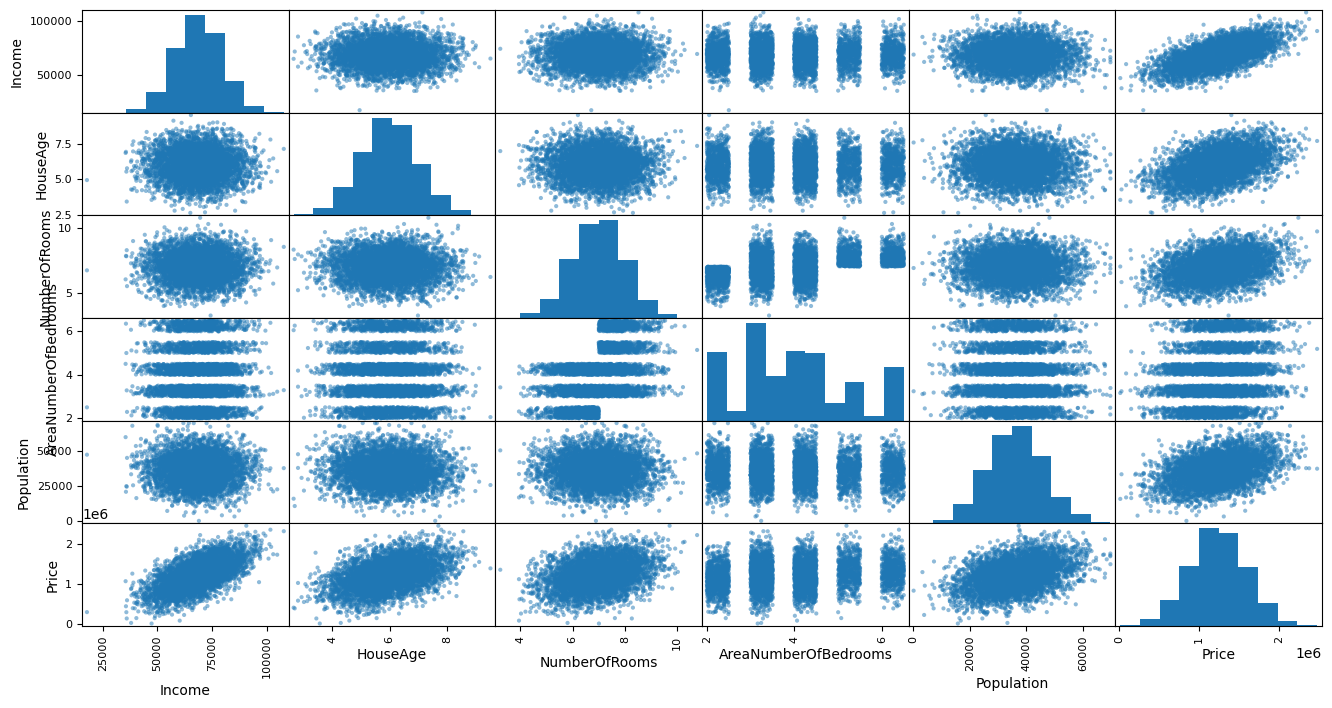

In [6]:
pd.plotting.scatter_matrix(housing,figsize=(16,8))

### 2. Build a one-factor Linear Regression model using that variable

In [7]:
import statsmodels.api as sm

X,Y = housing.Income,housing.Price

X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params


const    -221579.478223
Income        21.195483
dtype: float64

In [8]:
results.summary(yname="Price",xname=['Constant','Income'],title="Single factor fit Price vs Income ")

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Single factor fit Price vs Income                       
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     3463.
Date:                Wed, 22 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:02:32   Log-Likelihood:                -69651.
No. Observations:                5000   AIC:                         1.393e+05
Df Residuals:                    4998   BIC:                         1.393e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Constant   -2.216e+05    2.5e+04     -8.863      0.000   -2.71e+05   -1.73e+05
Income        21.1955      0.360     58.844      0.000      20.489      21.902
==============================================================================
Omnibus:                        0.527   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.768   Jarque-Bera (JB):                0.572
Skew:                           0.007   Prob(JB):                        0.751
Kurtosis:                       2.950   Cond. No.                     4.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 3. Print out the model performance metrics (MSE, R-square).

In [9]:
pred = results.predict(X)
f'Mean squared error is {((pred - Y)**2).sum()/pred.shape[0]}'
((pred - Y)**2).sum()/pred.shape[0]

73645940735.13448

In [10]:
from statsmodels.tools.eval_measures import mse
f'Mean squared error is {mse(pred,Y)}'

'Mean squared error is 73645940735.13448'

### 4. Plot your best-fitted line on top of the data

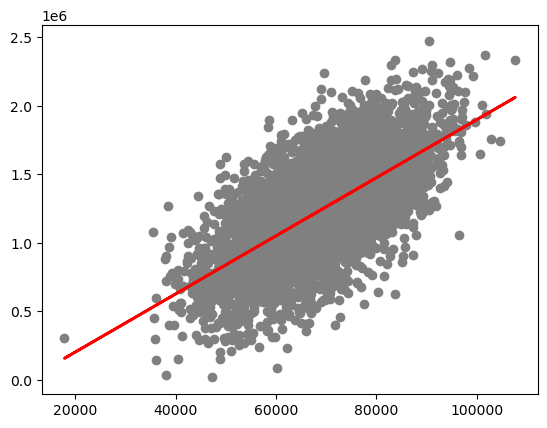

In [11]:
plt.scatter(X.Income,Y,  color='gray')
plt.plot(X.Income,pred, color='red', linewidth=2)
plt.show()

### 5. Perform a 10-fold cross validation and determine if your model pass the cross-validation.


In [12]:
import random

X,Y = housing.Income,housing.Price

for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    X_train = sm.add_constant(X_train)
    model = sm.OLS(Y_train,X_train)
    results = model.fit()
    pred = results.predict(sm.add_constant(X_test))
    
    print(results.summary(yname="Price",xname=['Constant','Income'],title="Single factor fit Price vs Income "))
    print(f'Mean squared error is {mse(pred,Y_test)}')

                      Single factor fit Price vs Income                       
Dep. Variable:                  Price   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     2864.
Date:                Wed, 22 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:02:32   Log-Likelihood:                -55678.
No. Observations:                4000   AIC:                         1.114e+05
Df Residuals:                    3998   BIC:                         1.114e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Constant   -2.266e+05   2.76e+04     -8.203      0.0

The R^2 performance and mean squared errors are similar for each sample of the train test split

In [13]:
# show your code here
# perform a 10-fold cross validation etc

import statsmodels.api as sm
from sklearn.base import BaseEstimator, RegressorMixin

#https://stackoverflow.com/questions/41045752/using-statsmodel-estimations-with-scikit-learn-cross-validation-is-it-possible
class SMWrapper(BaseEstimator, RegressorMixin):
    """ A universal sklearn-style wrapper for statsmodels regressors """
    def __init__(self, model_class, fit_intercept=True):
        self.model_class = model_class
        self.fit_intercept = fit_intercept
    def fit(self, X, y):
        if self.fit_intercept:
            X = sm.add_constant(X)
        self.model_ = self.model_class(y, X)
        self.results_ = self.model_.fit()
        return self
    def predict(self, X):
        if self.fit_intercept:
            X = sm.add_constant(X)
        return self.results_.predict(X)

In [14]:
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

print(cross_val_score(SMWrapper(sm.OLS), X, Y, scoring='r2'))
# print(cross_val_score(LinearRegression(), X, Y, scoring='r2'))

[0.42609368 0.44101264 0.36403575 0.41903461 0.38274133]


### 6. Add one addition variable to build a 2-factors model. Explain your reason why you choose that variable.

In [15]:
# show your code here
# perform a 10-fold cross validation etc

X,Y = housing[['Income','AreaNumberOfBedrooms']],housing.Price

X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params


const                  -394980.665685
Income                      21.091585
AreaNumberOfBedrooms     45343.354351
dtype: float64

In [16]:
results.summary(yname="Price",xname=['Constant','Income','AreaNumberOfBedrooms'],title="2 factor fit Price vs Income ")

<class 'statsmodels.iolib.summary.Summary'>
"""
                        2 factor fit Price vs Income                          
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     1919.
Date:                Wed, 22 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:02:33   Log-Likelihood:                -69542.
No. Observations:                5000   AIC:                         1.391e+05
Df Residuals:                    4997   BIC:                         1.391e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Constant              -3.95e+05   2.71e+04    -14.578      0.000   -4.48e+05   -3.42e+05
Income                  21.0916      0.353     59.823      0.000      20.400      21.783
AreaNumberOfBedrooms  4.534e+04   3044.774     14.892      0.000    3.94e+04    5.13e+04
==============================================================================
Omnibus:                        0.478   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.788   Jarque-Bera (JB):                0.473
Skew:                           0.024   Prob(JB):                        0.789
Kurtosis:                       3.000   Cond. No.                     5.01e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

***Pick an additional variable to build a two-factors linear regression model***


In [17]:
pred = results.predict(X)
f'Mean squared error is {mse(pred,Y)}'

'Mean squared error is 70516279989.61708'

In [18]:
# type your code here
# perform a 10-fold cross validation
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    X_train = sm.add_constant(X_train)
    model = sm.OLS(Y_train,X_train)
    results = model.fit()
    pred = results.predict(sm.add_constant(X_test))
    
    print(results.summary(yname="Price",xname=['Constant','Income','AreaNumberOfBedrooms'],title="Single factor fit Price vs Income "))
    print(f'Mean squared error is {mse(pred,Y_test)}')

                      Single factor fit Price vs Income                       
Dep. Variable:                  Price   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     1508.
Date:                Wed, 22 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:02:33   Log-Likelihood:                -55637.
No. Observations:                4000   AIC:                         1.113e+05
Df Residuals:                    3997   BIC:                         1.113e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Constant             -3.892e+05 

 I chose to add an additional 'AreaNumberOfBedrooms' feature vector because it has a high correlation to the target Price feature. Having done 10 rounds of validation where the R^2 and adjusted R^2 has higher performance than just the single factor linear model, we can assume that adding the 'AreaNumberOfBedrooms' feature was beneficial. Adding this additional feature also makes mean squared error lower.

In [19]:
# Comments on your result 